In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('nyc_listings.csv')

In [3]:
df.dtypes

listing_id                                        int64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [4]:
df.isnull().sum()
# there is missing data! what do we do?!?
# there is enought missing rows from host_response_time, host_response_rate, and host_acceptance_rate 
# (greater than 15,000 rows) to warrant getting rid of these columns

# there is enough missing rows from reviews_scores_rating, review_scores_accuracy, 
# review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location,
# review_scores_value, and reviews_per_month (greater than 9,000 rows) to warrant getting rid of these columns

listing_id                                         0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              13
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               9296
Length: 74, dtype: int64

In [5]:
df.drop(['listing_url'], axis = 1, inplace = True)
df.drop(['scrape_id'], axis = 1, inplace = True)
df.drop(['last_scraped'], axis = 1, inplace = True)
df.drop(['name'], axis = 1, inplace = True)
df.drop(['description'], axis = 1, inplace = True) # don't have the resources/time/knowledge to extract anything from this
df.drop(['neighborhood_overview'], axis = 1, inplace = True)
df.drop(['picture_url'], axis = 1, inplace = True)
df.drop(['host_url'], axis = 1, inplace = True)
df.drop(['host_name'], axis = 1, inplace = True)
df.drop(['host_since'], axis = 1, inplace = True)
df.drop(['host_location'], axis = 1, inplace = True)
df.drop(['host_about'], axis = 1, inplace = True)
df.drop(['host_response_time'], axis = 1, inplace = True)
df.drop(['host_response_rate'], axis = 1, inplace = True)
df.drop(['host_acceptance_rate'], axis = 1, inplace = True)
df.drop(['host_thumbnail_url'], axis = 1, inplace = True)
df.drop(['host_picture_url'], axis = 1, inplace = True)
df.drop(['host_neighbourhood'], axis = 1, inplace = True)
df.drop(['neighbourhood'], axis = 1, inplace = True)
df.drop(['latitude'], axis = 1, inplace = True)
df.drop(['longitude'], axis = 1, inplace = True)
df.drop(['bathrooms'], axis = 1, inplace = True) # entire column missing
df.drop(['minimum_minimum_nights'], axis = 1, inplace = True)
df.drop(['maximum_minimum_nights'], axis = 1, inplace = True)
df.drop(['minimum_maximum_nights'], axis = 1, inplace = True)
df.drop(['maximum_maximum_nights'], axis = 1, inplace = True)
df.drop(['calendar_updated'], axis = 1, inplace = True)
df.drop(['calendar_last_scraped'], axis = 1, inplace = True)
df.drop(['first_review'], axis = 1, inplace = True)
df.drop(['last_review'], axis = 1, inplace = True)
df.drop(['review_scores_rating'], axis = 1, inplace = True)
df.drop(['review_scores_accuracy'], axis = 1, inplace = True)
df.drop(['review_scores_cleanliness'], axis = 1, inplace = True)
df.drop(['review_scores_checkin'], axis = 1, inplace = True)
df.drop(['review_scores_communication'], axis = 1, inplace = True)
df.drop(['review_scores_location'], axis = 1, inplace = True)
df.drop(['review_scores_value'], axis = 1, inplace = True)
df.drop(['reviews_per_month'], axis = 1, inplace = True)
df.drop(['license'], axis = 1, inplace = True)

# this may be able to be parse in the same way that the amenities column is
df.drop(['host_verifications'], axis = 1, inplace = True)

# find out how korosh is parsing through amenities
df.drop(['amenities'], axis = 1, inplace = True)

In [6]:
df.dtypes
# do we care about id, name, host_id, host_name (identifiers)?

listing_id                                        int64
host_id                                           int64
host_is_superhost                                object
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            float64
price                                            object
minimum_nights                                    int64
maximum_nights                                  

In [7]:
df.isnull().sum()

listing_id                                         0
host_id                                            0
host_is_superhost                                111
host_listings_count                              111
host_total_listings_count                        111
host_has_profile_pic                             111
host_identity_verified                           111
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms_text                                   105
bedrooms                                        3936
beds                                             611
price                                              0
minimum_nights                                     0
maximum_nights                                     0
minimum_nights_avg_ntm                        

In [8]:
df['has_availability'] = df['has_availability'].map({'t' : 1, 'f' : 0})
df['instant_bookable'] = df['instant_bookable'].map({'t' : 1, 'f' : 0})
df['host_is_superhost'] = df['host_is_superhost'].map({'t' : 1, 'f' : 0})

df['price']=df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'])

df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t' : 1, 'f' : 0})
df['host_identity_verified'] = df['host_identity_verified'].map({'t' : 1, 'f' : 0})

df['bathrooms_text'] = pd.Categorical(df['bathrooms_text'])
df['bathrooms_text'] = df['bathrooms_text'].cat.codes

df['neighbourhood_cleansed'] = pd.Categorical(df['neighbourhood_cleansed'])
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].cat.codes

df['neighbourhood_group_cleansed'] = pd.Categorical(df['neighbourhood_group_cleansed'])
df['neighbourhood_group_cleansed'] = df['neighbourhood_group_cleansed'].cat.codes

df['property_type'] = pd.Categorical(df['property_type'])
df['property_type'] = df['property_type'].cat.codes

df['room_type'] = pd.Categorical(df['room_type'])
df['room_type'] = df['room_type'].cat.codes

In [9]:
df.dtypes

listing_id                                        int64
host_id                                           int64
host_is_superhost                               float64
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                            float64
host_identity_verified                          float64
neighbourhood_cleansed                            int16
neighbourhood_group_cleansed                       int8
property_type                                      int8
room_type                                          int8
accommodates                                      int64
bathrooms_text                                     int8
bedrooms                                        float64
beds                                            float64
price                                           float64
minimum_nights                                    int64
maximum_nights                                  

In [13]:
# trying to fill null/na values
# interpolate vs ffill
df['minimum_nights_avg_ntm'].fillna(method = "ffill", inplace = True)
df['maximum_nights_avg_ntm'].fillna(method = "ffill", inplace = True)

# assuming one bed per bedroom to fill in missing stuff in bedrooms column
df['bedrooms'].fillna(df['beds'], inplace=True)

#dropping any other rows with missing values
df.dropna(inplace = True)

In [14]:
df.isnull().sum()

listing_id                                      0
host_id                                         0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms_text                                  0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0


<AxesSubplot:>

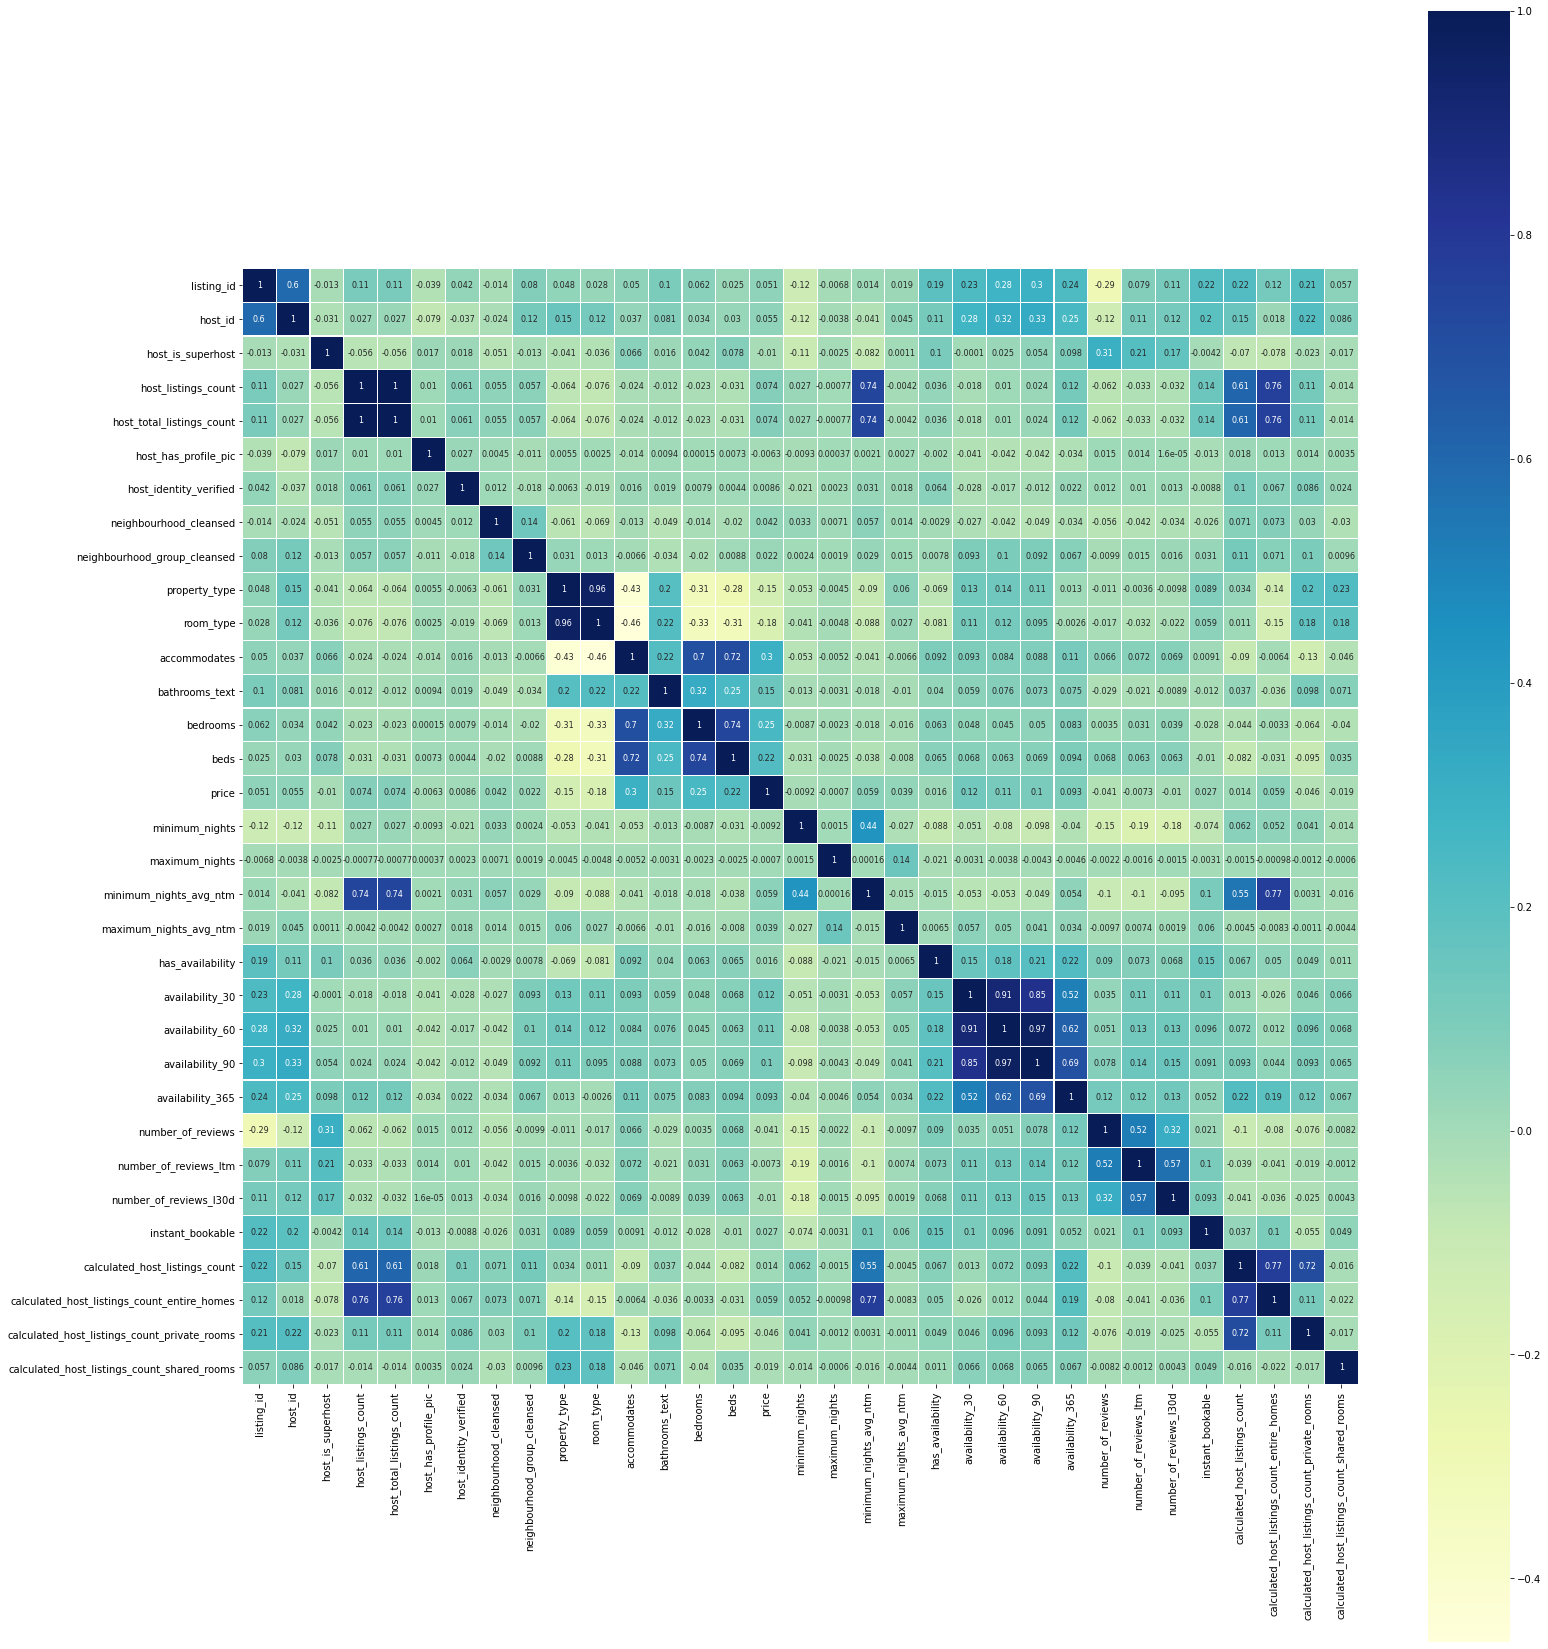

In [15]:
df.corr()
plt.rcParams['figure.figsize'] = [25, 30]
sn.heatmap(df.corr(), vmin=df.corr().values.min(), vmax=1, cmap="YlGnBu", square=True, 
        linewidths=0.1, annot=True, annot_kws={"size":8})  

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36201 entries, 0 to 36922
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_id                                    36201 non-null  int64  
 1   host_id                                       36201 non-null  int64  
 2   host_is_superhost                             36201 non-null  float64
 3   host_listings_count                           36201 non-null  float64
 4   host_total_listings_count                     36201 non-null  float64
 5   host_has_profile_pic                          36201 non-null  float64
 6   host_identity_verified                        36201 non-null  float64
 7   neighbourhood_cleansed                        36201 non-null  int16  
 8   neighbourhood_group_cleansed                  36201 non-null  int8   
 9   property_type                                 36201 non-null 

In [18]:
df.describe()

,listing_id,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,...,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,3.620100e+04,3.620100e+04,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000,...,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000
mean,2.744722e+07,1.058772e+08,0.182233,29.975028,29.975028,0.995194,0.824673,109.651778,1.706168,29.063645,...,27.557195,122.984255,23.352559,4.084583,0.494682,0.265435,13.273142,6.778404,6.365100,0.051601
std,1.652529e+07,1.224710e+08,0.386041,200.234006,200.234006,0.069163,0.380252,69.318116,0.763959,15.092486,...,33.464286,138.072658,49.685069,13.924960,1.823778,0.441570,44.757134,31.438785,28.520461,0.457401
min,2.595000e+03,2.438000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.233667e+07,1.054929e+07,0.000000,1.000000,1.000000,1.000000,1.000000,52.000000,1.000000,16.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2.794950e+07,4.592840e+07,0.000000,1.000000,1.000000,1.000000,1.000000,98.000000,2.000000,17.000000,...,2.000000,60.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,4.311894e+07,1.760018e+08,0.000000,3.000000,3.000000,1.000000,1.000000,181.000000,2.000000,43.000000,...,60.000000,263.000000,20.000000,2.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000
max,5.200698e+07,4.209650e+08,1.000000,5069.000000,5069.000000,1.000000,1.000000,222.000000,4.000000,74.000000,...,90.000000,365.000000,1006.000000,650.000000,161.000000,1.000000,307.000000,297.000000,251.000000,10.000000
